Для выполнения этого задания требуется сгенерировать `DataFrame` с синтетическими данными. `DataFrame` должен состоять из `10000` строк и `5` колонок:

* `user_id` – идентификатор пользователя. Длина `user_id` должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: `"1234567890abcdefghijk"`. Для каждой строки в `DataFrame` значение `user_id` формируются случайным образом.

* `order_number` – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от `1` до `10`.

* `click2delivery` – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним `1440` и стандартным отклонением `200`.

*  `order_items_sum` – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром `λ = 1`, смещённого на `+1`.

* `retention` – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения `1, 2, 3, 4, 5` с вероятностями `0.35, 0.25, 0.2, 0.15` и `0.05` соответственно.

В случае, если в колонке `user_id` встречаются дублирующиеся значения, оставь только первое из них.

In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

def generate_user_id():
  characters = "1234567890abcdefghijk"
  return ''.join(random.choice(characters) for _ in range(15))

def generate_df(n):
  data = {
      'user_id': [generate_user_id() for _ in range(n)],
      'order_number': np.random.randint(1, 11, size=n),
      'click2delivery': np.random.normal(1440, 200, size=n),
      'order_items_sum': np.random.exponential(1, size=n) + 1,
      'retention': np.random.choice([1, 2, 3, 4, 5], size=n, p=[0.35, 0.25, 0.2, 0.15, 0.05])
  }
  df = pd.DataFrame(data)
  return df

df = pd.DataFrame()
n = 10_000

while n:
  new_df = generate_df(n)
  df = pd.concat([df, new_df])
  df = df.drop_duplicates(subset='user_id', keep='first')
  n = 10_000 - len(df)

df.head()

,user_id,order_number,click2delivery,order_items_sum,retention
0,k4198854h3id213,7,1198.160258,1.010227,1
1,78gj1h7khd8ei91,4,1451.348337,2.189504,1
2,6da957a43c4bbj9,8,1462.691208,1.968382,1
3,2eh4c3h0kjbi732,5,1477.167526,2.035588,2
4,80384c9ekb6bb79,7,1623.974303,1.469017,2


In [2]:
len(df)

10000

Для всех строк датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [3]:
orders = (df.groupby('order_number')['click2delivery'].agg(mean_time='mean').reset_index())

In [4]:
orders

,order_number,mean_time
0,1,1443.937094
1,2,1442.508835
2,3,1435.860172
3,4,1444.343693
4,5,1441.499895
5,6,1442.861916
6,7,1439.866081
7,8,1443.426737
8,9,1431.180554
9,10,1444.398974


In [5]:
df = df.merge(orders, how='inner', left_on='order_number', right_on='order_number')

In [6]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081


Отдельной колонкой добавить значения последовательности, начинающейся с `0` и `1`, где каждый следующий элемент является суммой двух предыдущих, умноженных на `0.5`.

In [7]:
arr = [0, 1]
while len(arr) < 10_000:
  arr.append(sum(arr[-2:]) * 0.5)

In [8]:
len(arr)

10000

In [9]:
df['seq'] = arr

Напиши функцию, которая принимает на вход значение `user_id` и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в `user_id`, затем квадрат числа, полученного из всех цифр в `user_id` в той последовательности, в которой они встречаются в `user_id`.
Добавь результат применения этой функции к `user_id` в новый столбец. Использование циклов вне функции запрещено.

In [10]:
def process_user_id(user_id):
  letters = ''.join(filter(str.isalpha, user_id))
  digits = ''.join(filter(str.isdigit, user_id))

  return f'{letters}{int(digits) ** 2}'

df['transformed_user_id'] = df['user_id'].apply(process_user_id)

In [11]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,k4198854h3id213,7,1198.160258,1.010227,1,1439.866081,0.000,khid1763037761149968363369
1,80384c9ekb6bb79,7,1623.974303,1.469017,2,1439.866081,1.000,cekbbb646174306428403041
2,e5958hh9idicb85,7,1316.771308,2.666632,1,1439.866081,0.500,ehhidicb35509502230225
3,hdj5866d16ad896,7,1277.894274,1.457489,5,1439.866081,0.750,hdjdad344119382672674816
4,1007dijkaeee7gf,7,1192.082397,1.650405,5,1439.866081,0.625,dijkaeeegf101545929


Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
`click2delivery`, `order_items_sum` и `retention`. Построй гистограммы распределения значений в столбцах.

In [12]:
rounded_df = df.copy()
rounded_df[['click2delivery', 'order_items_sum', 'retention']] = rounded_df[['click2delivery', 'order_items_sum', 'retention']].astype(int)

In [13]:
rounded_df.head()

,user_id,order_number,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,k4198854h3id213,7,1198,1,1,1439.866081,0.000,khid1763037761149968363369
1,80384c9ekb6bb79,7,1623,1,2,1439.866081,1.000,cekbbb646174306428403041
2,e5958hh9idicb85,7,1316,2,1,1439.866081,0.500,ehhidicb35509502230225
3,hdj5866d16ad896,7,1277,1,5,1439.866081,0.750,hdjdad344119382672674816
4,1007dijkaeee7gf,7,1192,1,5,1439.866081,0.625,dijkaeeegf101545929


In [14]:
modes = (rounded_df[['click2delivery', 'order_items_sum', 'retention']].mode().head(1).set_index(pd.Index(['mode'])))

describe_df = (df[['click2delivery', 'order_items_sum', 'retention']].describe().loc[['mean', '50%', 'std']])

pd.concat([describe_df, modes])

,click2delivery,order_items_sum,retention
mean,1441.003580,1.997569,2.294100
50%,1440.085797,1.698760,2.000000
std,201.296013,0.997145,1.231973
mode,1446.000000,1.000000,1.000000


In [15]:
import seaborn as sns

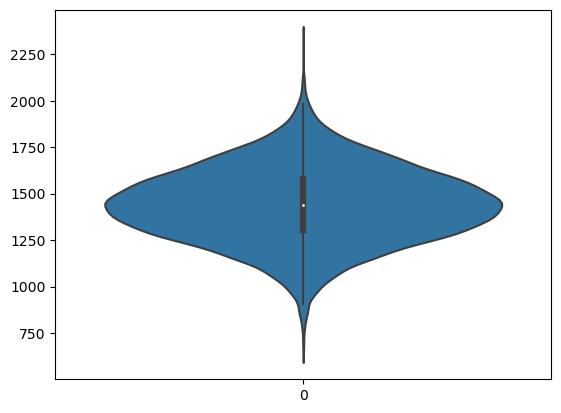

In [16]:
sns.violinplot(df['click2delivery']);

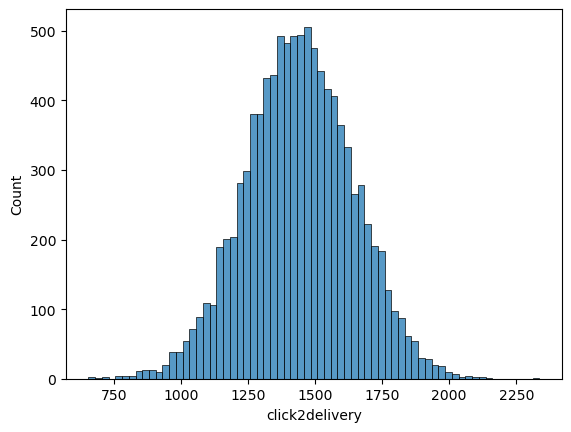

In [17]:
sns.histplot(df['click2delivery']);

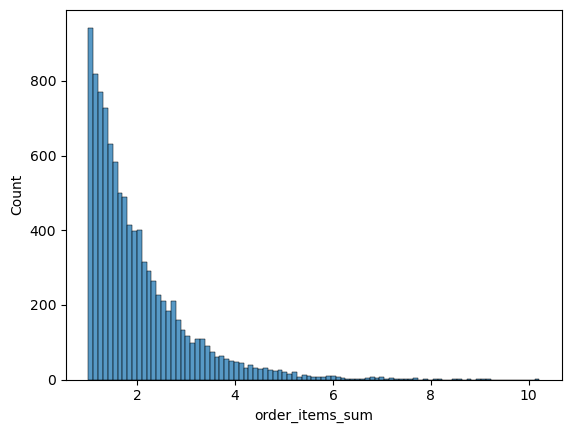

In [18]:
sns.histplot(df['order_items_sum']);

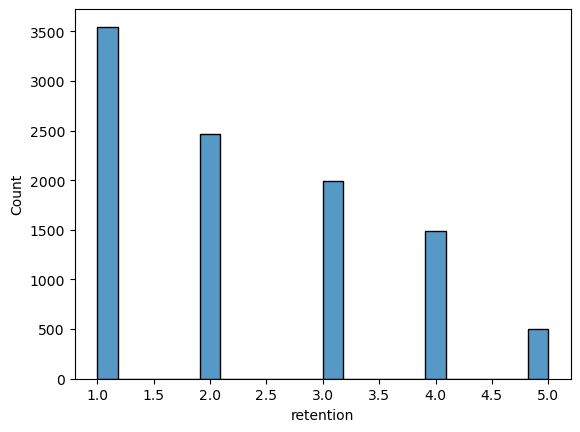

In [19]:
sns.histplot(df['retention']);

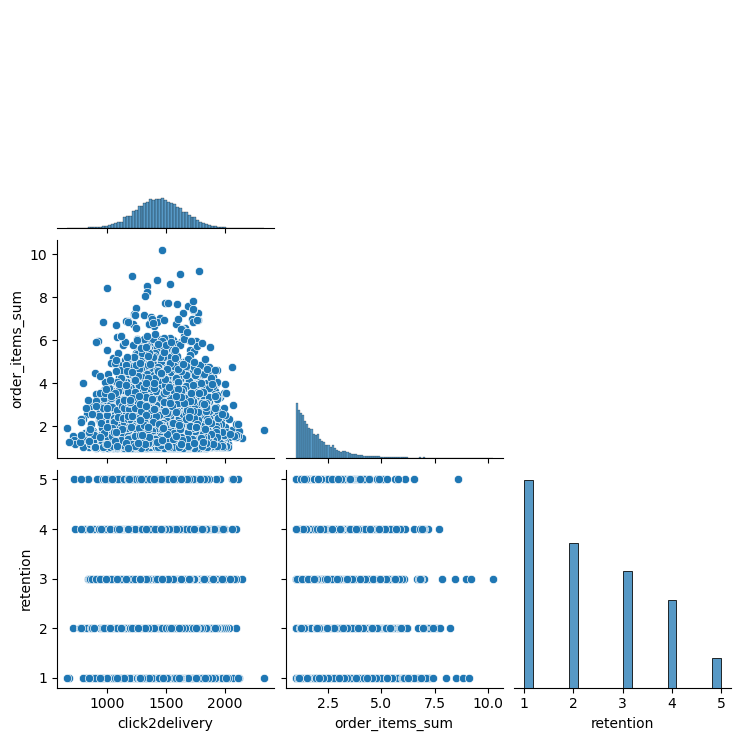

In [20]:
sns.pairplot(df[['click2delivery', 'order_items_sum', 'retention']], corner=True)